In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
indicadores = pd.read_csv("12-continuidade-de-servico-indicadores-gerais-de-continuidade-de-servico.csv", delimiter=';')
indicadores

,ANO,NUTS_III,CODIGO_CONCELHO,Concelho,zona rqs,saifi at num,saidi at min,maifi at num,tiepi mt min,end mt mwh,saifi mt num,saidi mt min,maifi mt num,saifi bt num,saidi bt min,ligacao_auxiliar_mapa
0,2022,Algarve,806,Lagoa,Concelho,0,0,0,"40,03410787","10,95962182","1,229383933","43,94258314","4,251137047","1,225017366","68,44265896",1
1,2022,Algarve,812,São Brás de Alportel,Concelho,0,0,0,"101,5744158","6,462113181","1,553845129","90,74031721","4,073503932","1,887307384","128,4379609",1
2,2022,Alentejo Litoral,1509,Santiago do Cacém,Zona C,0,0,1,"44,59456497","6,901322283","2,982636046","47,34006508","17,80674682","4,292747649","93,85391878",1
3,2022,Alentejo Litoral,1509,Santiago do Cacém,Concelho,0,0,1,"55,47358274","13,03378639","3,141415416","53,46167895","15,14978776","3,778155313","81,58602982",1
4,2022,Algarve,801,Albufeira,Zona C,0,0,0,"43,9094975","13,42395423","1,416022201","43,20802862","7,362719266","1,53547735","50,75262917",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,2014,Algarve,805,Faro,Zona C,0,0,0,"87,0487","19,8246","1,3707","90,673","5,85109","1,34314","154,812",1
10004,2014,Região de Aveiro,110,Ílhavo,Zona B,0,0,0,"45,3521","10,6899","1,21312","44,9854","9,02175","0,902799","39,824",1
10005,2014,Médio Tejo,509,Sertã,Zona A,0,0,0,0,0,0,0,0,0,0,1
10006,2014,Lezíria do Tejo,1415,Salvaterra de Magos,Zona C,0,0,0,"55,0593","2,20049","0,853415","46,6469","29,0496","0,365206","9,48744",1


In [14]:
colunas_a_converter = ["saifi at num", 
                       "saidi at min", 
                       "maifi at num", 
                       "tiepi mt min", 
                       "end mt mwh", 
                       "saifi mt num", 
                       "saidi mt min", 
                       "maifi mt num"]

#################################################################
# IGNORAR PORQUE POWERBI é a vírgula!! mas deve ser mudado depois

#for coluna in colunas_a_converter:
#  indicadores[coluna] = indicadores[coluna].astype(float)

indicadores.dtypes

ANO                             int64
NUTS_III                       object
CODIGO_CONCELHO                 int64
Concelho                       object
zona rqs                       object
saifi at num                   object
saidi at min                   object
maifi at num                   object
tiepi mt min                   object
end mt mwh                     object
saifi mt num                   object
saidi mt min                   object
maifi mt num                   object
saifi bt num                   object
saidi bt min                   object
ligacao_auxiliar_mapa           int64
codigo_concelho_sem_digitos    object
dtype: object

In [12]:
indicadores['codigo_concelho_sem_digitos'] = indicadores['CODIGO_CONCELHO'].astype(str).str[:-2]
indicadores.loc[:, ['CODIGO_CONCELHO', 'codigo_concelho_sem_digitos']]

,CODIGO_CONCELHO,codigo_concelho_sem_digitos
0,806,8
1,812,8
2,1509,15
3,1509,15
4,801,8
...,...,...
10003,805,8
10004,110,1
10005,509,5
10006,1415,14


In [20]:
codigo_distritos = {
    "1": "Aveiro",
    "2": "Beja",
    "3": "Braga",
    "4": "Bragança",
    "5": "Castelo Branco",
    "6": "Coimbra",
    "7": "Évora",
    "8": "Faro",
    "9": "Guarda",
    "10": "Leiria",
    "11": "Lisboa",
    "12": "Portalegre",
    "13": "Porto",
    "14": "Santarém",
    "15": "Setúbal",
    "16": "Viana do Castelo",
    "17": "Vila Real",
    "18": "Viseu",
    "31": "Ilha da Madeira",
    "32": "Ilha de Porto Santo",
    "41": "Ilha de Santa Maria",
    "42": "Ilha de São Miguel",
    "43": "Ilha Terceira",
    "44": "Ilha da Graciosa",
    "45": "Ilha de São Jorge",
    "46": "Ilha do Pico",
    "47": "Ilha do Faial",
    "48": "Ilha das Flores",
    "49": "Ilha do Corvo",
}

indicadores["distrito"] = indicadores["codigo_concelho_sem_digitos"].map(codigo_distritos)
indicadores.loc[:, ['CODIGO_CONCELHO', 'codigo_concelho_sem_digitos', 'distrito']]

,CODIGO_CONCELHO,codigo_concelho_sem_digitos,distrito
0,806,8,Faro
1,812,8,Faro
2,1509,15,Setúbal
3,1509,15,Setúbal
4,801,8,Faro
...,...,...,...
10003,805,8,Faro
10004,110,1,Aveiro
10005,509,5,Castelo Branco
10006,1415,14,Santarém


In [18]:
indicadores["distrito"].unique()

array(['Faro', 'Setúbal', 'Braga', 'Bragança', 'Vila Real', 'Porto',
       'Aveiro', 'Coimbra', 'Castelo Branco', 'Viseu', 'Lisboa',
       'Santarém', 'Viana do Castelo', 'Leiria', 'Guarda', 'Beja',
       'Portalegre', 'Évora'], dtype=object)

In [22]:
indicadores.to_csv("12-continuidade-de-servico-indicadores-gerais-de-continuidade-de-servico_dif.csv", sep=";")
indicadores = pd.read_csv("12-continuidade-de-servico-indicadores-gerais-de-continuidade-de-servico_dif.csv", delimiter=';')
indicadores

,Unnamed: 0,ANO,NUTS_III,CODIGO_CONCELHO,Concelho,zona rqs,saifi at num,saidi at min,maifi at num,tiepi mt min,end mt mwh,saifi mt num,saidi mt min,maifi mt num,saifi bt num,saidi bt min,ligacao_auxiliar_mapa,codigo_concelho_sem_digitos,distrito
0,0,2022,Algarve,806,Lagoa,Concelho,0,0,0,"40,03410787","10,95962182","1,229383933","43,94258314","4,251137047","1,225017366","68,44265896",1,8,Faro
1,1,2022,Algarve,812,São Brás de Alportel,Concelho,0,0,0,"101,5744158","6,462113181","1,553845129","90,74031721","4,073503932","1,887307384","128,4379609",1,8,Faro
2,2,2022,Alentejo Litoral,1509,Santiago do Cacém,Zona C,0,0,1,"44,59456497","6,901322283","2,982636046","47,34006508","17,80674682","4,292747649","93,85391878",1,15,Setúbal
3,3,2022,Alentejo Litoral,1509,Santiago do Cacém,Concelho,0,0,1,"55,47358274","13,03378639","3,141415416","53,46167895","15,14978776","3,778155313","81,58602982",1,15,Setúbal
4,4,2022,Algarve,801,Albufeira,Zona C,0,0,0,"43,9094975","13,42395423","1,416022201","43,20802862","7,362719266","1,53547735","50,75262917",1,8,Faro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,10003,2014,Algarve,805,Faro,Zona C,0,0,0,"87,0487","19,8246","1,3707","90,673","5,85109","1,34314","154,812",1,8,Faro
10004,10004,2014,Região de Aveiro,110,Ílhavo,Zona B,0,0,0,"45,3521","10,6899","1,21312","44,9854","9,02175","0,902799","39,824",1,1,Aveiro
10005,10005,2014,Médio Tejo,509,Sertã,Zona A,0,0,0,0,0,0,0,0,0,0,1,5,Castelo Branco
10006,10006,2014,Lezíria do Tejo,1415,Salvaterra de Magos,Zona C,0,0,0,"55,0593","2,20049","0,853415","46,6469","29,0496","0,365206","9,48744",1,14,Santarém


In [32]:
colunas_a_converter = ["saifi at num", 
                       "saidi at min", 
                       "maifi at num", 
                       "tiepi mt min", 
                       "end mt mwh", 
                       "saifi mt num", 
                       "saidi mt min", 
                       "maifi mt num",
                       "saifi bt num",
                       "saidi bt min"]
#################################################################
# IGNORAR PORQUE POWERBI é a vírgula!! mas deve ser mudado depois

colunas_a_converter = ["saifi bt num",
                       "saidi bt min"]

for coluna in colunas_a_converter:
    indicadores[coluna] = indicadores[coluna].str.replace(",", ".")

for coluna in colunas_a_converter:
    indicadores[coluna] = indicadores[coluna].astype(float)

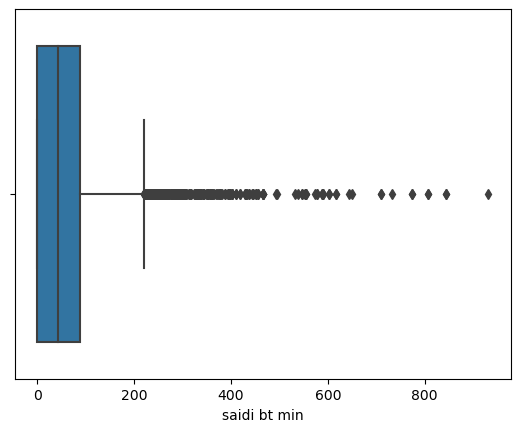

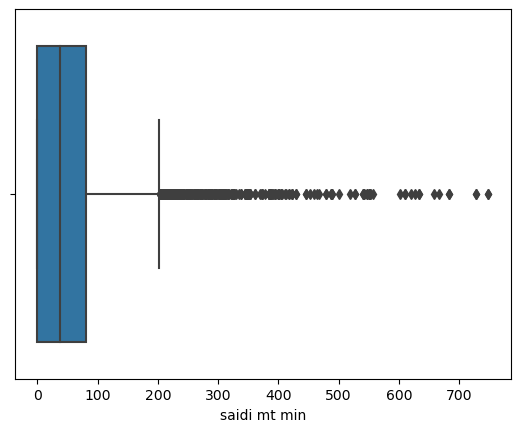

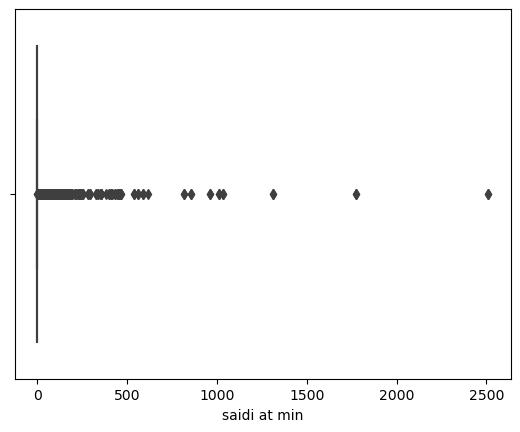

In [35]:
sns.boxplot(x=indicadores['saidi bt min'])
plt.show()
sns.boxplot(x=indicadores['saidi mt min'])
plt.show()
sns.boxplot(x=indicadores['saidi at min'])
plt.show()

In [46]:
print((indicadores['saidi bt min'] <= 3).sum()/indicadores['saidi bt min'].nunique())
print((indicadores['saidi mt min'] <= 3).sum()/indicadores['saidi mt min'].nunique())
print((indicadores['saidi at min'] <= 3).sum()/indicadores['saidi at min'].nunique())

0.6427659186279876
0.6540501005668312
38.65863453815261


In [53]:
indicadores[(indicadores['Concelho'] == "Lagoa")].sort_values("ANO")
# indicadores[(indicadores['Concelho'] == "Lagoa") & (indicadores["ANO"] == 2015)]

,Unnamed: 0,ANO,NUTS_III,CODIGO_CONCELHO,Concelho,zona rqs,saifi at num,saidi at min,maifi at num,tiepi mt min,end mt mwh,saifi mt num,saidi mt min,maifi mt num,saifi bt num,saidi bt min,ligacao_auxiliar_mapa,codigo_concelho_sem_digitos,distrito
9985,9985,2014,Algarve,806,Lagoa,Zona A,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,8,Faro
3350,3350,2014,Algarve,806,Lagoa,Zona C,0.0,0.0,0.0,68.994100,13.822500,2.233670,67.587500,8.055710,2.588720,90.712100,1,8,Faro
9840,9840,2014,Algarve,806,Lagoa,Zona B,0.0,0.0,0.0,44.035500,2.341060,0.948276,42.414400,4.241380,0.691855,24.268400,1,8,Faro
9776,9776,2014,Algarve,806,Lagoa,Concelho,0.0,0.0,0.0,63.593800,16.163600,1.993680,62.875200,7.344080,2.101720,73.649800,1,8,Faro
2756,2756,2015,Algarve,806,Lagoa,Zona A,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,8,Faro
2855,2855,2015,Algarve,806,Lagoa,Zona C,0.0,0.0,0.0,110.201000,21.908900,2.480860,98.765500,6.945270,2.946750,118.222000,1,8,Faro
2934,2934,2015,Algarve,806,Lagoa,Concelho,0.0,0.0,0.0,96.947500,24.503400,2.325540,88.801100,6.186840,2.573900,101.036000,1,8,Faro
6103,6103,2015,Algarve,806,Lagoa,Zona B,0.0,0.0,0.0,48.220400,2.594560,1.656550,45.807400,3.023210,1.497850,51.487300,1,8,Faro
9009,9009,2016,Algarve,806,Lagoa,Zona B,0.0,0.0,0.0,13.876400,0.803885,0.436848,20.426400,3.452020,0.332593,24.570000,1,8,Faro
9007,9007,2016,Algarve,806,Lagoa,Concelho,0.0,0.0,0.0,71.403500,17.866800,1.604570,76.998300,8.027570,1.504930,81.003100,1,8,Faro
